In [3]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 读取数据

In [5]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [6]:
print("Training data size: " + str(train.shape))
print("Testing data size: " + str(test.shape))

Training data size: (42000, 785)
Testing data size: (28000, 784)


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 数据预处理

In [8]:
X = train.values[:, 1:]
y = train['label'].values

In [9]:
test_x = test.values

In [10]:
X = X.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [11]:
y = to_categorical(y)
print("label size: " + str(y.shape))

label size: (42000, 10)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

# 可视化

In [15]:
X_train_ = X_train.reshape(X_train.shape[0], 28, 28)

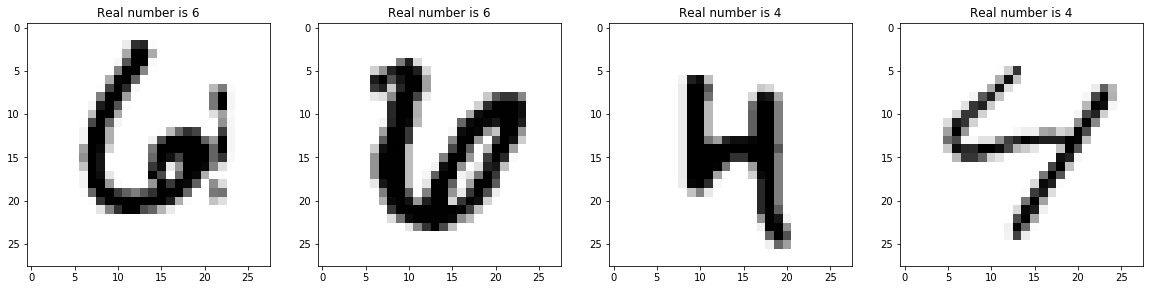

In [16]:
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train_[i], cmap='binary')
    digit = Y_train[i].argmax()
    ax.set(title="Real number is %s" %digit)

# 数据归一化

In [19]:
mean = np.mean(X_train)
std = np.std(X_train)

In [20]:
def standardize(x):
    return (x - mean)/std

# 模型

In [21]:
epochs = 20
batch_size = 64

In [33]:
def lenet5():
    model = Sequential()
    
    model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=50, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [29]:
train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [34]:
model = lenet5()
history = model.fit_generator(
    train_gen, 
    epochs=epochs,
    steps_per_epoch=X_train.shape[0]//batch_size,
    validation_data=test_gen,
    validation_steps=X_test.shape[0]//batch_size)

Epoch 1/20
525/525 [==============================] - 26s 50ms/step - loss: 3.1176 - acc: 0.7010 - val_loss: 0.2394 - val_acc: 0.9287
Epoch 2/20
525/525 [==============================] - 22s 43ms/step - loss: 0.1925 - acc: 0.9402 - val_loss: 0.1738 - val_acc: 0.9458
Epoch 3/20
525/525 [==============================] - 22s 43ms/step - loss: 0.1413 - acc: 0.9556 - val_loss: 0.1225 - val_acc: 0.9635
Epoch 4/20
525/525 [==============================] - 22s 43ms/step - loss: 0.1205 - acc: 0.9631 - val_loss: 0.1307 - val_acc: 0.9599
Epoch 5/20
525/525 [==============================] - 22s 43ms/step - loss: 0.1092 - acc: 0.9667 - val_loss: 0.1019 - val_acc: 0.9690
Epoch 6/20
525/525 [==============================] - 24s 46ms/step - loss: 0.0923 - acc: 0.9706 - val_loss: 0.0998 - val_acc: 0.9708
Epoch 7/20
525/525 [==============================] - 24s 47ms/step - loss: 0.0881 - acc: 0.9728 - val_loss: 0.1121 - val_acc: 0.9689
Epoch 8/20
525/525 [==============================] - 24s 46ms

In [41]:
def alexnet():
    model = Sequential()
    
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2), padding='valid'))
    
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))
    
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = alexnet()
history = model.fit_generator(
    train_gen, 
    epochs=epochs,
    steps_per_epoch=X_train.shape[0]//batch_size,
    validation_data=test_gen,
    validation_steps=X_test.shape[0]//batch_size)

Epoch 1/20
206/525 [==========>...................] - ETA: 9:26 - loss: 14.3669 - acc: 0.1041